In [1]:
import pandas as pd
import requests
import re
import datetime
from datetime import timedelta
import time
import numpy as np
from scipy.stats import norm
import math
from matplotlib import pyplot as plt
from datetime import timedelta
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from tensorflow.keras.layers import Dense, Dropout
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import layers
from tensorflow.keras.layers import Dense, Dropout
import statsmodels.formula.api as smf 

In [2]:
data_df = pd.read_csv('final_df_processed_3.csv')
data_df.head()

,Unnamed: 0,property_id,sale_price,building_year_built,zip_code,Address_Google,closest_zip_1,distance_1,closest_zip_2,distance_2,...,Unemployment Rate_3,sale_price_1,sale_price_2,sale_price_3,California AGI_1,California AGI_2,California AGI_3,Labor Force_1,Labor Force_2,Labor Force_3
0,0,2506034039,240002,1943.0,91342,"12626 SAN FERNANDO RD, LOS ANGELES, CA 91342, USA",91340,1.58,91344,2.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2505017041,331000,1965.0,91342,"12938 DE HAVEN AVE, LOS ANGELES, CA 91342, USA",91340,1.58,91344,2.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2530002019,299000,1958.0,91342,"11521 HELA AVE, LOS ANGELES, CA 91342, USA",91340,1.58,91344,2.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2506029006,200002,1948.0,91342,"12765 WOODCOCK AVE, LOS ANGELES, CA 91342, USA",91340,1.58,91344,2.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2506035025,275002,1947.0,91342,"12577 RALSTON AVE, LOS ANGELES, CA 91342, USA",91340,1.58,91344,2.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
len(data_df)

937473

In [4]:
len(data_df.loc[data_df["Year"] >= 2017])

327064

In [5]:
zip_df = data_df.loc[data_df['zip_code'] == 93535]
zip_df

,Unnamed: 0,property_id,sale_price,building_year_built,zip_code,Address_Google,closest_zip_1,distance_1,closest_zip_2,distance_2,...,Unemployment Rate_3,sale_price_1,sale_price_2,sale_price_3,California AGI_1,California AGI_2,California AGI_3,Labor Force_1,Labor Force_2,Labor Force_3
10003,10003,3146014003,100000,1964.0,93535,"44533 HANSTEAD AVE, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10004,10004,3140023050,175001,2007.0,93535,"43711 RAYSACK AVE, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10005,10005,3170044036,118000,1992.0,93535,"3004 HILDRETH CT, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10006,10006,3150026080,184501,2009.0,93535,"2220 E NUGENT ST, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10007,10007,3148018075,100001,1980.0,93535,"1344 FRANKLIN AVE, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21860,21860,3162010029,345003,1956.0,93535,"17110 E AVENUE K12, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,-0.531513,0.403551,0.724900,0.161483,0.000599,0.001549,0.003239,0.508263,-0.591260,0.719562
21861,21861,3070006008,325003,1987.0,93535,"41028 168TH ST E, LAKE LOS ANGELES, CA 93535, USA",93534,2.22,93536,5.13,...,-0.524676,0.398840,0.713835,0.159818,0.000593,0.001534,0.003206,0.501847,-0.583261,0.708633
21862,21862,3176031036,566005,2019.0,93535,"1748 E HOLGUIN ST, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,-0.517964,0.394198,0.703051,0.158170,0.000587,0.001518,0.003174,0.495544,-0.575425,0.697979
21863,21863,3170040083,435004,2004.0,93535,"1034 E AVENUE K11, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,-0.511374,0.389625,0.692535,0.156541,0.000582,0.001503,0.003142,0.489351,-0.567746,0.687588


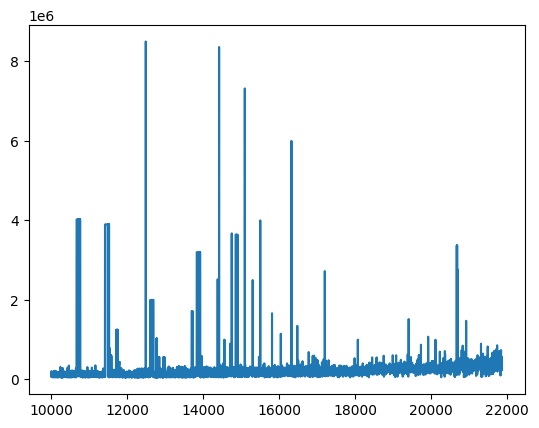

In [6]:
plt.plot(zip_df.index, zip_df['sale_price'])

In [7]:
zip_df['sale_price_Prev'] = zip_df['sale_price'].shift(1)
zip_df['change_sale_price'] = zip_df['sale_price'] - zip_df['sale_price_Prev']


mod1 = smf.ols(f'change_sale_price ~ sale_price_Prev', data = zip_df).fit() 
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:      change_sale_price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     974.4
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          1.20e-205
Time:                        20:19:19   Log-Likelihood:            -1.6774e+05
No. Observations:               11861   AIC:                         3.355e+05
Df Residuals:                   11859   BIC:                         3.355e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.921e+04   3459.152     

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_7957/2461574441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_df['sale_price_Prev'] = zip_df['sale_price'].shift(1)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_7957/2461574441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_df['change_sale_price'] = zip_df['sale_price'] - zip_df['sale_price_Prev']


In [8]:
# Extract the t-statistic for sale_price_Prev
t_stat_sale_price_Prev = mod1.tvalues['sale_price_Prev']
print("T-stat for sale_price_Prev:", t_stat_sale_price_Prev)

T-stat for sale_price_Prev: -31.21554567888494


In [9]:
data_df.columns

Index(['Unnamed: 0', 'property_id', 'sale_price', 'building_year_built',
       'zip_code', 'Address_Google', 'closest_zip_1', 'distance_1',
       'closest_zip_2', 'distance_2', 'closest_zip_3', 'distance_3', 'Month',
       'Year', 'Returns', 'California AGI', 'City_Name', 'Unemployment Rate',
       'Labor Force', 'Date', 'property_type_SINGLE FAMILY DWELLING',
       'property_type_SINGLE FAMILY RESIDENCE', 'Zip_month',
       'zip_1_Unemployment Rate_1', 'zip_1_Unemployment Rate_2',
       'zip_1_Unemployment Rate_3', 'zip_1_sale_price_1', 'zip_1_sale_price_2',
       'zip_1_sale_price_3', 'zip_1_California AGI_1',
       'zip_1_California AGI_2', 'zip_1_California AGI_3',
       'zip_1_Labor Force_1', 'zip_1_Labor Force_2', 'zip_1_Labor Force_3',
       'zip_2_Unemployment Rate_1', 'zip_2_Unemployment Rate_2',
       'zip_2_Unemployment Rate_3', 'zip_2_sale_price_1', 'zip_2_sale_price_2',
       'zip_2_sale_price_3', 'zip_2_California AGI_1',
       'zip_2_California AGI_2', 'zip

In [10]:
data_df['Quarter'] = data_df['Month'].apply(lambda x: 4 if x >= 9 else (3 if x >= 6 else (2 if x >= 2 else 1)))
data_df.dropna(inplace=True)
data_df.head()

,Unnamed: 0,property_id,sale_price,building_year_built,zip_code,Address_Google,closest_zip_1,distance_1,closest_zip_2,distance_2,...,sale_price_1,sale_price_2,sale_price_3,California AGI_1,California AGI_2,California AGI_3,Labor Force_1,Labor Force_2,Labor Force_3,Quarter
0,0,2506034039,240002,1943.0,91342,"12626 SAN FERNANDO RD, LOS ANGELES, CA 91342, USA",91340,1.58,91344,2.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,1,2505017041,331000,1965.0,91342,"12938 DE HAVEN AVE, LOS ANGELES, CA 91342, USA",91340,1.58,91344,2.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,2,2530002019,299000,1958.0,91342,"11521 HELA AVE, LOS ANGELES, CA 91342, USA",91340,1.58,91344,2.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,3,2506029006,200002,1948.0,91342,"12765 WOODCOCK AVE, LOS ANGELES, CA 91342, USA",91340,1.58,91344,2.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,4,2506035025,275002,1947.0,91342,"12577 RALSTON AVE, LOS ANGELES, CA 91342, USA",91340,1.58,91344,2.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [11]:
data_df.sort_values(by='Date', inplace=True)

In [12]:
data_df.drop(columns=['Unnamed: 0', 'property_id', 'Address_Google', 'Month',
       'Year','Date'], inplace=True)

In [13]:
data_df.drop(columns=['Zip_month'], inplace=True)

In [14]:
data_df = pd.get_dummies(data_df, columns=['zip_code'], drop_first=True, dtype=int)



In [15]:
data_df.drop(columns=['closest_zip_1', 'closest_zip_2', 'closest_zip_3' ,'City_Name'], inplace=True)

In [16]:
int(0.6 * len(data_df))

562483

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2
import pandas as pd

def prepare_time_series_split(data_df, train_ratio=0.9):
    """Prepare data with temporal train/test split"""
    if 'date' in data_df.columns:
        data_df = data_df.sort_values('date')
    
    # Calculate split index
    n = len(data_df)
    train_idx = int(n * train_ratio)
    
    # Split data temporally
    train_df = data_df.iloc[:train_idx]
    test_df = data_df.iloc[train_idx:]
    
    # Separate features and target
    X_columns = [col for col in data_df.columns if col != 'sale_price']
    
    X_train = train_df[X_columns]
    X_test = test_df[X_columns]
    
    y_train = train_df['sale_price'].values
    y_test = test_df['sale_price'].values
    
    return X_train, X_test, y_train, y_test

def create_enhanced_model(input_shape, learning_rate=0.001):
    """Create enhanced model with advanced architecture"""
    model = Sequential([
        # Input layer with regularization
        Dense(256, input_shape=input_shape,
              kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),
              bias_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        LeakyReLU(alpha=0.1),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(128, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        LeakyReLU(alpha=0.1),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        LeakyReLU(alpha=0.1),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(32, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        LeakyReLU(alpha=0.1),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(1)
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    
    def custom_loss(y_true, y_pred):
        mse = tf.keras.losses.mean_squared_error(y_true, y_pred)
        mae = tf.keras.losses.mean_absolute_error(y_true, y_pred)
        return 0.7 * mse + 0.3 * mae
    
    model.compile(
        optimizer=optimizer,
        loss=custom_loss,
        metrics=['mae', 'mse']
    )
    
    return model

def train_enhanced_model(model, X_train, y_train, batch_size=32, epochs=200):
    """Train model without validation split"""
    
    def lr_schedule(epoch):
        initial_lr = 0.001
        drop = 0.5
        epochs_drop = 20.0
        lr = initial_lr * np.power(drop, np.floor((1 + epoch)/epochs_drop))
        return lr
    
    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)
    
    callbacks = [
        ModelCheckpoint(
            'best_model.h5',
            monitor='loss',
            save_best_only=True,
            verbose=1
        ),
        lr_scheduler
    ]
    
    try:
        # Data augmentation for training
        augmented_X = X_train.copy()
        augmented_y = y_train.copy()
        
        # Add slight noise to features
        noise = np.random.normal(0, 0.001, augmented_X.shape)
        augmented_X = augmented_X + noise
        
        history = model.fit(
            augmented_X, augmented_y,
            batch_size=batch_size,
            epochs=epochs,
            callbacks=callbacks,
            verbose=1
        )
        return history
    except Exception as e:
        print(f"Error during training: {str(e)}")
        return None

def evaluate_model(model, X_test, y_test):
    """Evaluate model with comprehensive metrics"""
    try:
        y_pred = model.predict(X_test)
        
        mse = np.mean((y_test - y_pred.flatten()) ** 2)
        mae = np.mean(np.abs(y_test - y_pred.flatten()))
        rmse = np.sqrt(mse)
        
        ss_res = np.sum((y_test - y_pred.flatten()) ** 2)
        ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        
        print("\nModel Evaluation Metrics:")
        print(f"MSE: {mse:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"R-squared: {r2:.4f}")
        
        return y_pred
        
    except Exception as e:
        print(f"Error during evaluation: {str(e)}")
        return None

# Main execution
if __name__ == "__main__":
    try:
        # Prepare data with 90/10 split
        X_train, X_test, y_train, y_test = prepare_time_series_split(data_df)
        
        # Create and train model
        model = create_enhanced_model(input_shape=(X_train.shape[1],))
        history = train_enhanced_model(model, X_train, y_train)
        
        if history is not None:
            y_pred = evaluate_model(model, X_test, y_test)
            
    except Exception as e:
        print(f"Error in main execution: {str(e)}")

Metal device set to: Apple M2


2025-02-23 20:22:39.403121: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-23 20:22:39.404493: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-02-23 20:23:06.838074: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/200


2025-02-23 20:23:09.359882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26367/26367 [==============================] - ETA: 0s - loss: 731882848256.0000 - mae: 619631.5625 - mse: 1045546139648.0000
Epoch 1: loss improved from inf to 731882848256.00000, saving model to best_model.h5
26367/26367 [==============================] - 376s 14ms/step - loss: 731882848256.0000 - mae: 619631.5625 - mse: 1045546139648.0000 - lr: 0.0010
Epoch 2/200
26367/26367 [==============================] - ETA: 0s - loss: 668343205888.0000 - mae: 559784.1875 - mse: 954777010176.0000
Epoch 2: loss improved from 731882848256.00000 to 668343205888.00000, saving model to best_model.h5
26367/26367 [==============================] - 381s 14ms/step - loss: 668343205888.0000 - mae: 559784.1875 - mse: 954777010176.0000 - lr: 0.0010
Epoch 3/200
26365/26367 [============================>.] - ETA: 0s - loss: 567456038912.0000 - mae: 456925.5000 - mse: 810651484160.0000
Epoch 3: loss improved from 668343205888.00000 to 567479435264.00000, saving model to best_model.h5
26367/26367 [===========

26367/26367 [==============================] - 371s 14ms/step - loss: 344387092480.0000 - mae: 324405.8125 - mse: 491984224256.0000 - lr: 5.0000e-04
Epoch 23/200
26364/26367 [============================>.] - ETA: 0s - loss: 343815880704.0000 - mae: 324297.6250 - mse: 491166171136.0000
Epoch 23: loss improved from 344387092480.00000 to 343863754752.00000, saving model to best_model.h5
26367/26367 [==============================] - 2173s 82ms/step - loss: 343863754752.0000 - mae: 324306.0625 - mse: 491234656256.0000 - lr: 5.0000e-04
Epoch 24/200
26367/26367 [==============================] - ETA: 0s - loss: 343669145600.0000 - mae: 323517.2812 - mse: 490956193792.0000
Epoch 24: loss improved from 343863754752.00000 to 343669145600.00000, saving model to best_model.h5
26367/26367 [==============================] - 3562s 135ms/step - loss: 343669145600.0000 - mae: 323517.2812 - mse: 490956193792.0000 - lr: 5.0000e-04
Epoch 25/200
26365/26367 [============================>.] - ETA: 0s - lo

Epoch 45/200
26367/26367 [==============================] - ETA: 0s - loss: 338533482496.0000 - mae: 318868.6562 - mse: 483618816000.0000
Epoch 45: loss improved from 338539479040.00000 to 338533482496.00000, saving model to best_model.h5
26367/26367 [==============================] - 1230s 47ms/step - loss: 338533482496.0000 - mae: 318868.6562 - mse: 483618816000.0000 - lr: 2.5000e-04
Epoch 46/200
26367/26367 [==============================] - ETA: 0s - loss: 338352340992.0000 - mae: 319092.7188 - mse: 483363061760.0000
Epoch 46: loss improved from 338533482496.00000 to 338352340992.00000, saving model to best_model.h5
26367/26367 [==============================] - 544s 21ms/step - loss: 338352340992.0000 - mae: 319092.7188 - mse: 483363061760.0000 - lr: 2.5000e-04
Epoch 47/200
26367/26367 [==============================] - ETA: 0s - loss: 338435506176.0000 - mae: 318585.9688 - mse: 483480895488.0000
Epoch 47: loss did not improve from 338352340992.00000
26367/26367 [=================

26365/26367 [============================>.] - ETA: 0s - loss: 336024698880.0000 - mae: 316654.1562 - mse: 480036257792.0000
Epoch 67: loss did not improve from 335971713024.00000
26367/26367 [==============================] - 257s 10ms/step - loss: 336018964480.0000 - mae: 316651.6562 - mse: 480028098560.0000 - lr: 1.2500e-04
Epoch 68/200
26365/26367 [============================>.] - ETA: 0s - loss: 336279764992.0000 - mae: 316677.2188 - mse: 480400670720.0000
Epoch 68: loss did not improve from 335971713024.00000
26367/26367 [==============================] - 255s 10ms/step - loss: 336266100736.0000 - mae: 316671.7812 - mse: 480381206528.0000 - lr: 1.2500e-04
Epoch 69/200
26367/26367 [==============================] - ETA: 0s - loss: 335955689472.0000 - mae: 316325.3750 - mse: 479936905216.0000
Epoch 69: loss improved from 335971713024.00000 to 335955689472.00000, saving model to best_model.h5
26367/26367 [==============================] - 266s 10ms/step - loss: 335955689472.0000 - 

26367/26367 [==============================] - 269s 10ms/step - loss: 334092894208.0000 - mae: 315020.1875 - mse: 477275521024.0000 - lr: 6.2500e-05
Epoch 90/200
26363/26367 [============================>.] - ETA: 0s - loss: 334118486016.0000 - mae: 315168.3750 - mse: 477314580480.0000
Epoch 90: loss did not improve from 333647478784.00000
26367/26367 [==============================] - 279s 11ms/step - loss: 334192246784.0000 - mae: 315184.2500 - mse: 477420027904.0000 - lr: 6.2500e-05
Epoch 91/200
26367/26367 [==============================] - ETA: 0s - loss: 334113603584.0000 - mae: 315092.4375 - mse: 477304291328.0000
Epoch 91: loss did not improve from 333647478784.00000
26367/26367 [==============================] - 292s 11ms/step - loss: 334113603584.0000 - mae: 315092.4375 - mse: 477304291328.0000 - lr: 6.2500e-05
Epoch 92/200
26365/26367 [============================>.] - ETA: 0s - loss: 333955825664.0000 - mae: 315161.5625 - mse: 477079142400.0000
Epoch 92: loss did not improv

26367/26367 [==============================] - 239s 9ms/step - loss: 332146475008.0000 - mae: 313669.9062 - mse: 474494828544.0000 - lr: 3.1250e-05
Epoch 113/200
26366/26367 [============================>.] - ETA: 0s - loss: 332472057856.0000 - mae: 313850.0312 - mse: 474956693504.0000
Epoch 113: loss did not improve from 332146475008.00000
26367/26367 [==============================] - 233s 9ms/step - loss: 332468191232.0000 - mae: 313849.7188 - mse: 474951221248.0000 - lr: 3.1250e-05
Epoch 114/200
26363/26367 [============================>.] - ETA: 0s - loss: 332292456448.0000 - mae: 313498.8750 - mse: 474702184448.0000
Epoch 114: loss did not improve from 332146475008.00000
26367/26367 [==============================] - 233s 9ms/step - loss: 332267094016.0000 - mae: 313490.3750 - mse: 474665943040.0000 - lr: 3.1250e-05
Epoch 115/200
26363/26367 [============================>.] - ETA: 0s - loss: 332737118208.0000 - mae: 314147.0312 - mse: 475338506240.0000
Epoch 115: loss did not imp

Epoch 136/200
26367/26367 [==============================] - ETA: 0s - loss: 330975281152.0000 - mae: 312782.7188 - mse: 472821596160.0000
Epoch 136: loss improved from 331053105152.00000 to 330975281152.00000, saving model to best_model.h5
26367/26367 [==============================] - 260s 10ms/step - loss: 330975281152.0000 - mae: 312782.7188 - mse: 472821596160.0000 - lr: 1.5625e-05
Epoch 137/200
26367/26367 [==============================] - ETA: 0s - loss: 331177361408.0000 - mae: 312738.2812 - mse: 473108611072.0000
Epoch 137: loss did not improve from 330975281152.00000
26367/26367 [==============================] - 232s 9ms/step - loss: 331177361408.0000 - mae: 312738.2812 - mse: 473108611072.0000 - lr: 1.5625e-05
Epoch 138/200
26365/26367 [============================>.] - ETA: 0s - loss: 331258200064.0000 - mae: 312906.7812 - mse: 473222840320.0000
Epoch 138: loss did not improve from 330975281152.00000
26367/26367 [==============================] - 237s 9ms/step - loss: 331

26367/26367 [==============================] - ETA: 0s - loss: 330643767296.0000 - mae: 312637.0625 - mse: 472348065792.0000
Epoch 159: loss did not improve from 330110205952.00000
26367/26367 [==============================] - 275s 10ms/step - loss: 330643767296.0000 - mae: 312637.0625 - mse: 472348065792.0000 - lr: 7.8125e-06
Epoch 160/200
26365/26367 [============================>.] - ETA: 0s - loss: 330252681216.0000 - mae: 312462.5000 - mse: 471789535232.0000
Epoch 160: loss did not improve from 330110205952.00000
26367/26367 [==============================] - 283s 11ms/step - loss: 330245963776.0000 - mae: 312460.5312 - mse: 471779934208.0000 - lr: 3.9063e-06
Epoch 161/200
26365/26367 [============================>.] - ETA: 0s - loss: 329849143296.0000 - mae: 312112.3125 - mse: 471214063616.0000
Epoch 161: loss improved from 330110205952.00000 to 329865199616.00000, saving model to best_model.h5
26367/26367 [==============================] - 287s 11ms/step - loss: 329865199616.00

26366/26367 [============================>.] - ETA: 0s - loss: 329550495744.0000 - mae: 312014.9062 - mse: 470786605056.0000
Epoch 182: loss improved from 329580019712.00000 to 329555443712.00000, saving model to best_model.h5
26367/26367 [==============================] - 255s 10ms/step - loss: 329555443712.0000 - mae: 312017.1562 - mse: 470793682944.0000 - lr: 1.9531e-06
Epoch 183/200
26367/26367 [==============================] - ETA: 0s - loss: 329805627392.0000 - mae: 312179.8438 - mse: 471151312896.0000
Epoch 183: loss did not improve from 329555443712.00000
26367/26367 [==============================] - 275s 10ms/step - loss: 329805627392.0000 - mae: 312179.8438 - mse: 471151312896.0000 - lr: 1.9531e-06
Epoch 184/200
26367/26367 [==============================] - ETA: 0s - loss: 329963143168.0000 - mae: 312204.0938 - mse: 471375249408.0000
Epoch 184: loss did not improve from 329555443712.00000
26367/26367 [==============================] - 418s 16ms/step - loss: 329963143168.00

2025-02-24 19:18:43.271463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2930/2930 [==============================] - 4s 1ms/step

Model Evaluation Metrics:
MSE: 820123288909.59
MAE: 424959.78
RMSE: 905606.59
R-squared: 0.1491


In [18]:
# Calculate and print RMSE
rmse = mean_absolute_error(y_test, y_pred.flatten())
print(f"MAE: {rmse:.4f}")

MAE: 424959.7791
